# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Written Description of Three Observable Trends

###### On Latitude and Max Temperature

Looking at the scatter plot and linear regressions we created for comparing latitude and max temperature, it is safe to say that these are the proofs for the answer that it gets hotter as we get closer to the equator. To elaborate, from the scattor plot, we can see an n-shape, with equator being the middle point. In addition, the linear regression created for the Northern Hemisphere shows a strong negative relationship between latitude and max temperature, meaning as the latitude increases from the equator, the max temperature will descrease. Similarly, the linear regression created for the Southern Hemisphere shows a moderate positive relationship between latitude and max temperature, meaning as the latitude increases in the Southern Hemisphere(getting closer to equator), the max temperature will increase. These findings make sense, because equator is the closest to the sun, and so, it should be hotter the closer we are to the equator.

###### On Latitude and Humidity

Looking at the scatter plot and linear regressions we created for comparing latitude and humidity, it is possible that it gets more humid at the equator, although the scatter plot also shows that high humidity area is around the equator and the Northern Hemisphere. Nevertheless, the linear regression for the Northern Hemisphere shows a very weakly correlation between the increase of latitude and the increase of humidity. On the other hand, the linear regression for the Southern Hemisphere shows a slightly stronger but still weak correlation between the increase of latitude (moving closer to equator) and the increase of humidity. To conclude, we can't say safely that there is a relationship between latitude and humidity, and it it likely that other outside factors, such as seasons, affect humidity.

###### On Latitude and Wind Speed

Looking at the scatter plot and linear regression we created for comparing latitude and wind speed, it is possible that the closer to the equator the weaker the wind speed will be. We can see a rough u-shape from the scattor plot. In addition, the linear regression for the Northern Hemisphere shows a weak positive relationship between the latitude and the wind speed, meaning that as latitude increases in the Northern Hemisphere, the wind speed might increase. The linear regression for the Southern Hemisphere shows a weak negative relationship between the latitude and the wind speed, meaning that as latitude approaches the equator in the Southern Hemisphere, the wind speed might decrease. In summary, we can't say confidently that there is a relationship between latitude and wind speed, and more research is needed.

In [4]:
#!pip install citipy

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
#from datetime import datetime--didn't ended up using due to formatting issue

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [7]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#unit = "imperial"

#query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

#response = requests.get(query_url + "arraial do cabo").json()
#response2 = datetime.fromtimestamp(response["dt"])
#print(json.dumps(response, indent=4))
#res2
#Date": datetime.utcfromtimestamp(response["dt"]).strftime("%D %H:%M") --didn't ended up using due to formatting issue

{
    "coord": {
        "lon": -42.03,
        "lat": -22.97
    },
    "weather": [
        {
            "id": 300,
            "main": "Drizzle",
            "description": "light intensity drizzle",
            "icon": "09d"
        },
        {
            "id": 701,
            "main": "Mist",
            "description": "mist",
            "icon": "50d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 71.6,
        "feels_like": 76.15,
        "temp_min": 71.6,
        "temp_max": 71.6,
        "pressure": 1009,
        "humidity": 100
    },
    "visibility": 1500,
    "wind": {
        "speed": 6.93,
        "deg": 80
    },
    "clouds": {
        "all": 90
    },
    "dt": 1605733461,
    "sys": {
        "type": 1,
        "id": 8326,
        "country": "BR",
        "sunrise": 1605686125,
        "sunset": 1605733900
    },
    "timezone": -10800,
    "id": 3471451,
    "name": "Arraial do Cabo",
    "cod": 200
}


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

city_set = 1
city_number = 0
temp_info = []

print("Beginning Data Retrieval\n","-----------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    
    if city_number > 49:
        city_number = 1
        city_set += 1
        
    else:
        city_number += 1
            
    try:
        
        info = {
            "City": response["name"],
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        }
        
        temp_info.append(info)
    
        print(f"Processing Record {city_number} of Set {city_set} | {city}")

    except:
        
        print("City not found. Skipping...")

print("-----------------------------\n","Data Retrieval Complete\n","-----------------------------")

Beginning Data Retrieval
 -----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | tilichiki
Processing Record 3 of Set 1 | saint-joseph
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | avera
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | along
Processing Record 9 of Set 1 | genhe
Processing Record 10 of Set 1 | cheyenne
Processing Record 11 of Set 1 | hastings
Processing Record 12 of Set 1 | whitehaven
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | marfino
City not found. Skipping...
Processing Record 19 of Set 1 | clarence town
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | bubaque
Processing Record 23 of Set 1 | svetogorsk
Processing Rec

Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | oron
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | jinxiang
Processing Record 10 of Set 5 | airai
Processing Record 11 of Set 5 | preobrazheniye
Processing Record 12 of Set 5 | fairbanks
Processing Record 13 of Set 5 | port hardy
Processing Record 14 of Set 5 | amilly
Processing Record 15 of Set 5 | xiamen
Processing Record 16 of Set 5 | constantine
Processing Record 17 of Set 5 | tete
Processing Record 18 of Set 5 | honiara
Processing Record 19 of Set 5 | sembe
City not found. Skipping...
Processing Record 21 of Set 5 | darhan
Processing Record 22 of Set 5 | frolovo
Processing Record 23 of Set 5 | lasa
Processing Record 24 of Set 5 | mucurapo
Processing Record 25 of Set 5 | syracuse
Processing Record 26 of Set 5 | ancud
Processing Record 27 of Set 5 | cayenne
Processing Record 28 of Set 5 | pangai
Processing Record 29 of Set 5 | namibe
Processing Record 30 of Set 5 | narsaq
Processing Record 3

Processing Record 11 of Set 9 | nishihara
Processing Record 12 of Set 9 | fernley
Processing Record 13 of Set 9 | tambura
Processing Record 14 of Set 9 | sioux lookout
Processing Record 15 of Set 9 | banjar
Processing Record 16 of Set 9 | provideniya
Processing Record 17 of Set 9 | shumikha
Processing Record 18 of Set 9 | zhigansk
Processing Record 19 of Set 9 | djibo
Processing Record 20 of Set 9 | ankazoabo
Processing Record 21 of Set 9 | tambopata
Processing Record 22 of Set 9 | gusau
City not found. Skipping...
Processing Record 24 of Set 9 | college
Processing Record 25 of Set 9 | rio grande
Processing Record 26 of Set 9 | murashi
Processing Record 27 of Set 9 | labrea
Processing Record 28 of Set 9 | comodoro rivadavia
Processing Record 29 of Set 9 | severo-kurilsk
Processing Record 30 of Set 9 | miandrivazo
Processing Record 31 of Set 9 | sierra vista
Processing Record 32 of Set 9 | lichuan
Processing Record 33 of Set 9 | biak
Processing Record 34 of Set 9 | grindavik
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_data = pd.DataFrame(temp_info)
city_data.to_csv("../output_data/cities.csv")

In [12]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.92,25.57,60.80,100,81,4.70,ZA,1605733606
1,Tilichiki,60.47,166.10,2.48,93,100,4.36,RU,1605733606
2,Saint-Joseph,-21.37,55.62,66.02,69,75,17.22,RE,1605733606
3,Faanui,-16.48,-151.75,79.72,78,100,13.91,PF,1605733607
4,Avarua,-21.21,-159.78,78.80,83,100,11.41,CK,1605733590


In [13]:
lat_stats = [city_data["Lat"].count(),
             city_data["Lat"].mean(),
             city_data["Lat"].std(),
            city_data["Lat"].min(),
            city_data["Lat"].quantile(0.25),
            city_data["Lat"].median(),
            city_data["Lat"].quantile(0.75),
            city_data["Lat"].max() 
            ]

lng_stats = [city_data["Lng"].count(),
             city_data["Lng"].mean(),
             city_data["Lng"].std(),
            city_data["Lng"].min(),
            city_data["Lng"].quantile(0.25),
            city_data["Lng"].median(),
            city_data["Lng"].quantile(0.75),
            city_data["Lng"].max() 
            ]

max_temp_stats = [city_data["Max Temp"].count(),
             city_data["Max Temp"].mean(),
             city_data["Max Temp"].std(),
            city_data["Max Temp"].min(),
            city_data["Max Temp"].quantile(0.25),
            city_data["Max Temp"].median(),
            city_data["Max Temp"].quantile(0.75),
            city_data["Max Temp"].max() 
            ]

humidity_stats = [city_data["Humidity"].count(),
             city_data["Humidity"].mean(),
             city_data["Humidity"].std(),
            city_data["Humidity"].min(),
            city_data["Humidity"].quantile(0.25),
            city_data["Humidity"].median(),
            city_data["Humidity"].quantile(0.75),
            city_data["Humidity"].max() 
            ]

cloudiness_stats = [city_data["Cloudiness"].count(),
             city_data["Cloudiness"].mean(),
             city_data["Cloudiness"].std(),
            city_data["Cloudiness"].min(),
            city_data["Cloudiness"].quantile(0.25),
            city_data["Cloudiness"].median(),
            city_data["Cloudiness"].quantile(0.75),
            city_data["Cloudiness"].max() 
            ]

wind_speed_stats = [city_data["Wind Speed"].count(),
             city_data["Wind Speed"].mean(),
             city_data["Wind Speed"].std(),
            city_data["Wind Speed"].min(),
            city_data["Wind Speed"].quantile(0.25),
            city_data["Wind Speed"].median(),
            city_data["Wind Speed"].quantile(0.75),
            city_data["Wind Speed"].max() 
            ]

date_stats = [city_data["Date"].count(),
             city_data["Date"].mean(),
             city_data["Date"].std(),
            city_data["Date"].min(),
            city_data["Date"].quantile(0.25),
            city_data["Date"].median(),
            city_data["Date"].quantile(0.75),
            city_data["Date"].max() 
            ]
index_name = ["count","mean","std","min","25%","50%","75%","max"]

In [14]:
stat_df = pd.DataFrame({"":index_name,
                       "Lat":lat_stats,
                       "Lng":lng_stats,
                        "Max Temp":max_temp_stats,
                        "Humidity":humidity_stats,
                        "Cloudiness":cloudiness_stats,
                        "Wind Speed":wind_speed_stats,
                        "Date":date_stats
                       })
stats_df = stat_df.set_index("")
stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
,,,,,,,
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.508541,19.046144,55.764991,73.252252,55.304505,8.918414,1.605734e+09
std,33.201699,87.816091,25.158657,20.796534,39.613009,6.576889,8.165779e+01
min,-54.800000,-179.170000,-21.800000,6.000000,0.000000,0.110000,1.605733e+09
25%,-8.130000,-54.730000,37.400000,63.000000,12.000000,3.735000,1.605734e+09
50%,22.810000,24.000000,64.540000,79.000000,72.000000,7.670000,1.605734e+09
75%,47.650000,95.045000,76.390000,88.000000,94.500000,12.730000,1.605734e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,42.500000,1.605734e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
stats_df
# Max humidity is 100%, skipping this step

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
,,,,,,,
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.508541,19.046144,55.764991,73.252252,55.304505,8.918414,1.605734e+09
std,33.201699,87.816091,25.158657,20.796534,39.613009,6.576889,8.165779e+01
min,-54.800000,-179.170000,-21.800000,6.000000,0.000000,0.110000,1.605733e+09
25%,-8.130000,-54.730000,37.400000,63.000000,12.000000,3.735000,1.605734e+09
50%,22.810000,24.000000,64.540000,79.000000,72.000000,7.670000,1.605734e+09
75%,47.650000,95.045000,76.390000,88.000000,94.500000,12.730000,1.605734e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,42.500000,1.605734e+09


In [16]:
#  Get the indices of cities that have humidity over 100%.
humidity_over = city_data.loc[city_data["Humidity"] > 100].index
humidity_over

Int64Index([], dtype='int64')

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data.head(5) #data is clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.92,25.57,60.80,100,81,4.70,ZA,1605733606
1,Tilichiki,60.47,166.10,2.48,93,100,4.36,RU,1605733606
2,Saint-Joseph,-21.37,55.62,66.02,69,75,17.22,RE,1605733606
3,Faanui,-16.48,-151.75,79.72,78,100,13.91,PF,1605733607
4,Avarua,-21.21,-159.78,78.80,83,100,11.41,CK,1605733590


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

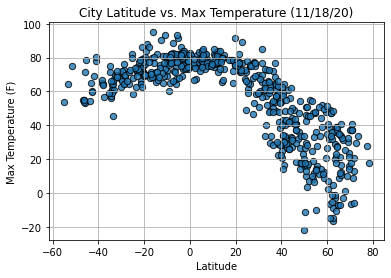

In [18]:
lat_temp_plot = city_data.plot(kind="scatter", x="Lat", y="Max Temp",grid=True, figsize=(6,4), edgecolors = "black", 
                               s=40, alpha=0.8, title="City Latitude vs. Max Temperature (11/18/20)")
lat_temp_plot.set_xlabel("Latitude")
lat_temp_plot.set_ylabel("Max Temperature (F)")
output_file = ("../output_data/latvstemp.png")
plt.savefig(output_file)
plt.show()

##### Plot Analysis: City Latitude vs. Max Temperature

The City Latitude vs. Max Temperature scatter plot shows the relationship between city latitude and max temperature. This scatter plot shows two different trends: 1) As latitude increases from point zero (moving in the Northern Hemisphere direction), max temperature tends to decrease, which means there is an inverse relationship between latitude and temperature. 2) As latitude approaches point zero from the left (moving towards the equator from the Southern Hemisphere), max temperature tends to increase, which means there is an positive relationship between latitude and temperature.

## Latitude vs. Humidity Plot

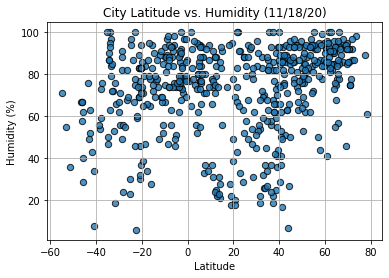

In [19]:
lat_humdity_plot = city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,4), edgecolors = "black", s=40, alpha=0.8,
              title="City Latitude vs. Humidity (11/18/20)")
lat_humdity_plot.set_xlabel("Latitude")
lat_humdity_plot.set_ylabel("Humidity (%)")
output_file2 = ("../output_data/latvshumi.png")
plt.savefig(output_file2)
plt.show()

##### Plot Analysis: City Latitude vs. Humidity

The City Latitude vs. Humidity scatter plot shows the relationship between city latitude and Humidity. This scatter plot shows two similar trends: 1) As latitude increases from point zero (moving in the Northern Hemisphere), humidity tends to increase, which means there is a positive relationship. 2) As latitude moves closer to point zero from the left (moving closer to equator from the Southern Hemisphere), humidity tends to increase, which means there is a positive relationship.

## Latitude vs. Cloudiness Plot

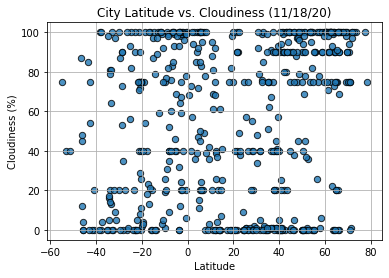

In [21]:
lat_cloudiness_plot = city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,4), edgecolors = "black", s=40, alpha=0.8,
              title="City Latitude vs. Cloudiness (11/18/20)")
lat_cloudiness_plot.set_xlabel("Latitude")
lat_cloudiness_plot.set_ylabel("Cloudiness (%)")
output_file3 = ("../output_data/latvscloud.png")
plt.savefig(output_file3)
plt.show()

##### Plot Analysis: City Latitude vs. Cloudiness

The City Latitude vs. Cloudiness scatter plot shows the relationship between city latitude and cloudiness. This scatter plot seems to show that there is no obvious trend, meaning there is possibly no relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

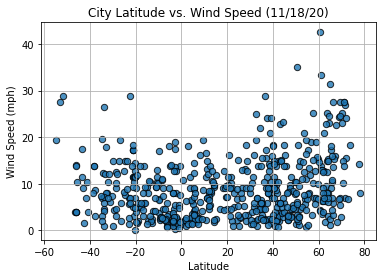

In [114]:
lat_wind_speed_plot = city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,4), edgecolors = "black", s=40, alpha=0.8,
              title="City Latitude vs. Wind Speed (11/18/20)")
lat_wind_speed_plot.set_xlabel("Latitude")
lat_wind_speed_plot.set_ylabel("Wind Speed (mph)")
output_file4 = ("../output_data/latvswind.png")
plt.savefig(output_file4)
plt.show()

##### Plot Analysis: City Latitude vs. Wind Speed

The City Latitude vs. Wind Speed scatter plot shows the relationship between city latitude and wind speed. This scatter plot shows two possible trends: 1) As latitude increases from point zero (moving in the Northern Hemisphere), wind speed seems to increase, which means there is possibly a weak positive relationship. 2) As latitude moves closer to point zero from the left (moving closer to equator from the Southern Hemisphere), wind speed seems to decrease, which means there is possibly a week negative relationship.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8276876279943932


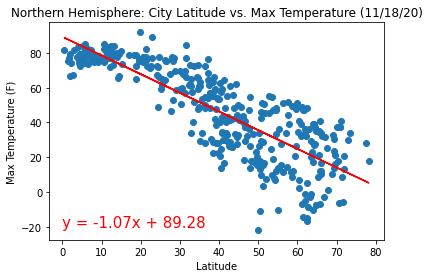

In [104]:
x_values = city_data.loc[city_data["Lat"] >= 0,"Lat"]
y_values = city_data.loc[city_data["Lat"] >= 0, "Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6123846183327565


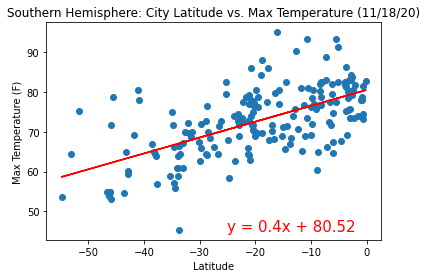

In [105]:
x_values2 = city_data.loc[city_data["Lat"] < 0,"Lat"]
y_values2 = city_data.loc[city_data["Lat"] < 0, "Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2, color="r")
plt.annotate(line_eq2,(-25,45),fontsize=15,color="red")

plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.show()

### Plot Analysis: City Latitude vs. Max Temperature

###### Northern Hemisphere

Looking at the r-value and linear regression for the Northern Hemisphere, we can see that there is a strong negative relationship between latitude and max temperature, meaning that as latitude increases in the Northern Hemisphere, the max temperature will decrease.

###### Southern Hemisphere

Looking at the r-value and linear regression for the Southern Hemisphere, we can see that there is a moderate positive relationship between latitude and max temperature, meaning that as latitude approaches the equator in the Southern Hemisphere, the max temperature will increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2913577489101829


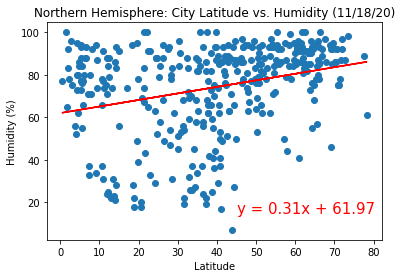

In [106]:
x_lat = city_data.loc[city_data["Lat"] >= 0,"Lat"]
y_hum = city_data.loc[city_data["Lat"] >= 0, "Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_hum)
regress_values3 = x_lat * slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_lat,y_hum)
plt.plot(x_lat,regress_values3, color="r")
plt.annotate(line_eq3,(45,15),fontsize=15,color="red")

plt.title("Northern Hemisphere: City Latitude vs. Humidity (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.35206862030941827


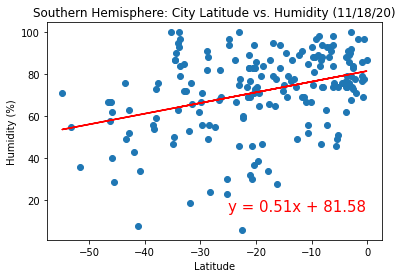

In [107]:
x_lats = city_data.loc[city_data["Lat"] < 0,"Lat"]
y_hums = city_data.loc[city_data["Lat"] < 0, "Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lats, y_hums)
regress_values4 = x_lats * slope + intercept
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_lats,y_hums)
plt.plot(x_lats,regress_values4, color="r")
plt.annotate(line_eq4,(-25,15),fontsize=15,color="red")

plt.title("Southern Hemisphere: City Latitude vs. Humidity (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
plt.show()

### Plot Analysis: City Latitude vs. Humidity

###### Northern Hemisphere

Looking at the r-value and linear regression for the Northern Hemisphere, we can see that there is a very weak positive relationship between latitude and humidity, meaning that as latitude increases in the Northern Hemisphere, the humidity might increase also.

###### Southern Hemisphere

Looking at the r-value and linear regression for the Southern Hemisphere, we can see that there is a weak positive relationship between latitude and humidity, meaning that as latitude approaches the equator in the Southern Hemisphere, the humidity might increase also.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2751905617101218


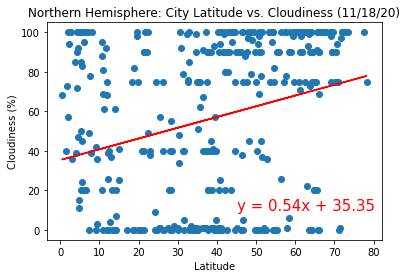

In [108]:
x_latc = city_data.loc[city_data["Lat"] >= 0,"Lat"]
y_cloud = city_data.loc[city_data["Lat"] >= 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latc, y_cloud)
regress_values5 = x_latc * slope + intercept
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_latc,y_cloud)
plt.plot(x_latc,regress_values5, color="r")
plt.annotate(line_eq5,(45,10),fontsize=15,color="red")

plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28080729820745703


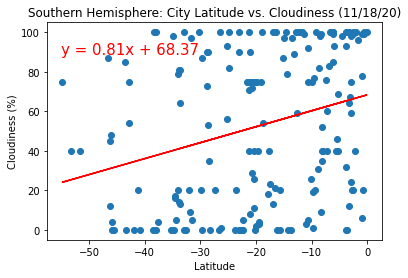

In [109]:
x_latcs = city_data.loc[city_data["Lat"] < 0,"Lat"]
y_clouds = city_data.loc[city_data["Lat"] < 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latcs, y_clouds)
regress_values6 = x_latcs * slope + intercept
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_latcs,y_clouds)
plt.plot(x_latcs,regress_values6, color="r")
plt.annotate(line_eq6,(-55,89),fontsize=15,color="red")

plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
plt.show()

### Plot Analysis: City Latitude vs. Cloudiness

###### Northern Hemisphere

Looking at the r-value and linear regression for the Northern Hemisphere, we can say that there is no relationship between latitude and cloudiness, meaning the changes in latitude in the Northern Hemisphere will not affect the cloudiness.

###### Southern Hemisphere

Looking at the r-value and linear regression for the Southern Hemisphere, we can say that there is no relationship between latitude and cloudiness, meaning the changes in latitude in the Southern Hemisphere will not affect the cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.3186138740460669


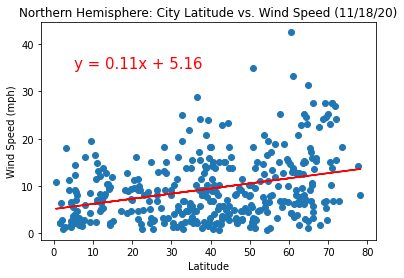

In [110]:
x_latw = city_data.loc[city_data["Lat"] >= 0,"Lat"]
y_wind = city_data.loc[city_data["Lat"] >= 0, "Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latw, y_wind)
regress_values7 = x_latw * slope + intercept
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_latw,y_wind)
plt.plot(x_latw,regress_values7, color="r")
plt.annotate(line_eq7,(5,35),fontsize=15,color="red")

plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3130131032685502


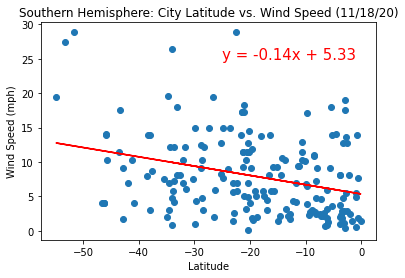

In [111]:
x_latws = city_data.loc[city_data["Lat"] < 0,"Lat"]
y_winds = city_data.loc[city_data["Lat"] < 0, "Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latws, y_winds)
regress_values8 = x_latws * slope + intercept
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_latws,y_winds)
plt.plot(x_latws,regress_values8, color="r")
plt.annotate(line_eq8,(-25,25),fontsize=15,color="red")

plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (11/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
plt.show()

### Plot Analysis: City Latitude vs. Wind Speed

###### Northern Hemisphere

Looking at the r-value and linear regression for the Northern Hemisphere, we can see that there is a weak positive relationship between latitude and wind speed, meaning that as latitude increases in the Northern Hemisphere, the wind speed might increase also.

###### Southern Hemisphere

Looking at the r-value and linear regression for the Southern Hemisphere, we can see that there is a weak negative relationship between latitude and wind speed, meaning that as latitude approaches the equator in the Southern Hemisphere, the wind speed might decrease.